In [23]:
import tensorflow as tf

In [24]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding,LSTM, Dense, Bidirectional, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import numpy as np

In [25]:
tokenizer = Tokenizer()
data = "Ho Ho Ho… /n Sandeshe Aate Hain /n Hamen Tadapaate Hain /n To Chitthee Aatee Hai /n Vo Poochhe Jaatee Hai /n Ke Ghar Kab Aaoge /n Ke Ghar Kab Aaoge /n Likho Kab Aaoge /n Ke Tum Bin Ye Ghar Soona Soona Hai /n Sandeshe Aate Hain /n Hamen Tadapaate Hain /n To Chitthee Aatee Hai /n Vo Poochhe Jaatee Hai /n Ke Ghar Kab Aaoge /n Ke Ghar Kab Aaoge /n Likho Kab Aaoge /n Ke Tum Bin Ye Ghar Soona Soona Hai /n Kisee Dilavaalee Ne /n Kisee Matavaalee Ne /n Hamen Khat Likha Hai /n Ye Hamase Poochha Hai /n Kisee Kee Saanson Ne /n Kisee Kee Dhadakan Ne /n Kisee Kee Choodee Ne /n Kisee Ke Kangan Ne /n Kisee Ke Kajare Ne /n Kisee Ke Gajare Ne /n Mahakatee Subahon Ne /n Machalatee Shaamon Ne /n Akelee Raaton Mein /n Adhooree Baaton Ne /n Tarasatee Baahon Ne /n Aur Poochha Hai Tarasee Nigaahon Ne /n Ke Ghar Kab Aaoge /n Ke Ghar Kab Aaoge /n Likho Kab Aaoge /n Ke Tum Bin Ye Dil Soona Soona Hai /n Sandeshe Aate Hain /n Hamen Tadapaate Hain /n To Chitthee Aatee Hai /n Vo Poochhe Jaatee Hai /n Ke Ghar Kab Aaoge /n Ke Ghar Kab Aaoge /n Likho Kab Aaoge /n Ke Tum Bin Ye Ghar Soona Soona Hai /n Mohabbat Vaalon Ne /n Hamaare Yaaron Ne /n Hamen Ye Likha Hai /n Ki Hamase Poochha Hai /n Hamaare Gaanvon Ne /n Aam Kee Chhaanvon Ne /n Puraane Peepal Ne /n Barasate Baadal Ne /n Khet Khaliyaanon Ne /n Hare Maidaanon Ne /n Basantee Belon Ne /n Jhoomatee Belon Ne /n Lachakate Jhoolon Ne /n Dahakate Phoolon Ne /n Chatakatee Kaliyon Ne /n Aur Poochha Hai Gaanv Kee Galiyon Ne /n Ke Ghar Kab Aaoge /n Ke Ghar Kab Aaoge /n Likho Kab Aaoge /n Ke Tum Bin Gaanv Soona Soona /n Sandeshe Aate Hain /n Hamen Tadapaate Hain /n To Chitthee Aatee Hai /n Vo Poochhe Jaatee Hai /n  Ke Ghar Kab Aaoge /n Ke Ghar Kab Aaoge /n Likho Kab Aaoge /n Ke Tum Bin Ye Ghar Soona Soona Hai /n Kabhee Ek Mamata Kee /n Pyaar Kee Ganga Kee /n Jo Chitthee Aatee Hai /n Saath Vo Laatee Hai /n Mere Din Bachapan Ke /n Khel Vo Aangan Ke /n Vo Saaya Aanchal Ka /n Vo Teeka Kaajal Ka /n Vo Loree Raaton Mein /n Vo Naramee Haathon Mein /n Vo Chaahat Aankhon Mein /n Vo Chinta Baaton Mein /n Bigadana Oopar Se /n Mohabbat Andar Se /n Kare Vo Devee Maan /n Yahee Har Khat Mein Poochhe Meree Maan /n Ke Ghar Kab Aaoge /n Ke Ghar Kab Aaoge /n Likho Kab Aaoge /n Ke Tum Bin Aangan Soona Soona Hai /n Sandeshe Aate Hain /n Hamen Tadapaate Hain /n To Chitthee Aatee Hai /n Vo Poochhe Jaatee Hai /n Ke Ghar Kab Aaoge /n Ke Ghar Kab Aaoge /n Likho Kab Aaoge /n Ke Tum Bin Ye Ghar Soona Soona Hai /n Ai Gujarane Vaalee Hava Bata /n Mera Itana Kaam Karegee Kya /n Mere Gaanv Ja /n Mere Doston Ko Salaam De /n Mere Gaanv Mein Hai Jo Vo Galee /n Jahaan Rehatee Hai Meree Dilaruba /n Use Mere Pyaar Ka Jaam De /n Use Mere Pyaar Ka Jaam De /n Vaheen Thodee Door Hai Ghar Mera /n Mere Ghar Mein Hai Meree Boodhee Maan /n Meree Maan Ke Pairon Ko Chhoo Ke Too /n Use Usake Bete Ka Naam De /n Ai Gujarane Vaalee Hava Zara /n Mere Doston /n Meree Dilaruba /n Meree Maan Ko Mera Payaam De /n Unhen Ja Ke Too Ye Payaam De /n Main Vaapas Aaoonga /n Main Vaapas Aaoonga /n Ghar Apane Gaanv Mein /n Usee Kee Chhaanv Mein /n Ki Maan Ke Aanchal Se /n Gaanv Kee Peepal Se /n Kisee Ke Kaajal Se /n  Kiya Jo Vaada Tha Vo Nibhaoonga /n Main Ek Din Aaoonga /n Main Ek Din Aaoonga /n Main Ek Din Aaoonga /n Main Ek Din Aaoonga /n Main Ek Din Aaoonga /n Main Ek Din Aaoonga /n Main Ek Din Aaoonga"
corpus = data.lower().split("/n")
tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1
print(tokenizer.word_index)
print(total_words)


{'ke': 1, 'hai': 2, 'ne': 3, 'ghar': 4, 'kab': 5, 'aaoge': 6, 'vo': 7, 'soona': 8, 'hain': 9, 'kee': 10, 'mein': 11, 'ye': 12, 'kisee': 13, 'main': 14, 'aaoonga': 15, 'likho': 16, 'tum': 17, 'bin': 18, 'ek': 19, 'mere': 20, 'din': 21, 'hamen': 22, 'chitthee': 23, 'aatee': 24, 'poochhe': 25, 'gaanv': 26, 'maan': 27, 'meree': 28, 'de': 29, 'sandeshe': 30, 'aate': 31, 'tadapaate': 32, 'to': 33, 'jaatee': 34, 'ka': 35, 'se': 36, 'poochha': 37, 'pyaar': 38, 'jo': 39, 'mera': 40, 'ko': 41, 'use': 42, 'ho': 43, 'khat': 44, 'likha': 45, 'hamase': 46, 'raaton': 47, 'baaton': 48, 'aur': 49, 'mohabbat': 50, 'hamaare': 51, 'ki': 52, 'peepal': 53, 'belon': 54, 'aangan': 55, 'aanchal': 56, 'kaajal': 57, 'ai': 58, 'gujarane': 59, 'vaalee': 60, 'hava': 61, 'ja': 62, 'doston': 63, 'dilaruba': 64, 'jaam': 65, 'too': 66, 'payaam': 67, 'vaapas': 68, 'ho…': 69, 'dilavaalee': 70, 'matavaalee': 71, 'saanson': 72, 'dhadakan': 73, 'choodee': 74, 'kangan': 75, 'kajare': 76, 'gajare': 77, 'mahakatee': 78, 'subah

In [27]:
input_sequences = []
for line in corpus:
  token_list = tokenizer.texts_to_sequences([line])[0]
  for i in range(1,len(token_list)):
    n_gram_sequence = token_list[:i+1]
    input_sequences.append(n_gram_sequence)

In [28]:
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences,maxlen=max_sequence_len,padding='pre'))

In [29]:
xs, labels = input_sequences[:, :-1], input_sequences[:, -1]
ys = tf.keras.utils.to_categorical(labels, num_classes = total_words)

In [30]:
from re import VERBOSE
from tensorflow.keras.layers import GRU
from tensorflow.keras.optimizers import Adam


model = Sequential()
model.add(Embedding(total_words, 128, input_length=max_sequence_len - 1))
model.add(Bidirectional(GRU(64, return_sequences=True)))
model.add(Dropout(0.4))
model.add(GRU(64, return_sequences=True))
model.add(Dropout(0.4))
model.add(GRU(64))
model.add(Dropout(0.4))
model.add(Dense(total_words, activation='softmax'))

optimizer = Adam(learning_rate=0.001)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

history = model.fit(xs, ys, epochs=700, verbose=1)

Epoch 1/700
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.0380 - loss: 5.0509
Epoch 2/700
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.0913 - loss: 4.8011
Epoch 3/700
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.0807 - loss: 4.3756
Epoch 4/700
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.0693 - loss: 4.3127
Epoch 5/700
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.0691 - loss: 4.2499
Epoch 6/700
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.1055 - loss: 4.0903
Epoch 7/700
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.1477 - loss: 4.0536
Epoch 8/700
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.1644 - loss: 3.9590
Epoch 9/700
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.1938 - loss: 3.7362
Epoch 10/700
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.1614 - loss: 3.7480
Epoch 11/700
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.2305 - loss: 3.5889
Epoch 12/700
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step

In [32]:
import matplotlib.pyplot as plt
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()

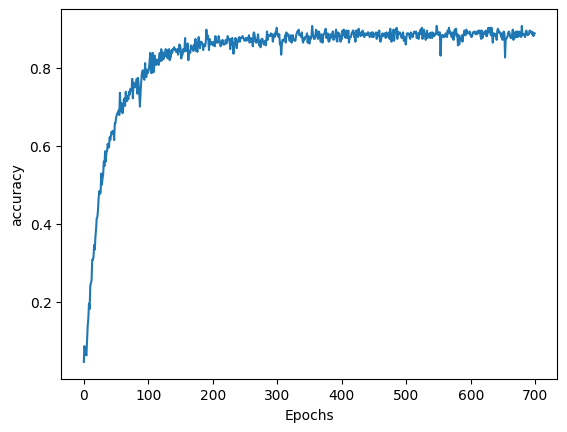

In [33]:
plot_graphs(history, 'accuracy')

In [34]:
seed_text = "Mere Ghar Mein Hai Meree Boodhee Maan"
next_words = 10
for _ in range(next_words):
  token_list = tokenizer.texts_to_sequences([seed_text])[0]
  token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
  predicted = np.argmax(model.predict(token_list, verbose=0),axis = 1)
  output_word = ""
  for word, index in tokenizer.word_index.items():
    if index == predicted:
      output_word = word
      break
  seed_text += " " + output_word
print(seed_text)

Mere Ghar Mein Hai Meree Boodhee Maan ke pairon ko chhoo ke too too mera payaam de
